In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


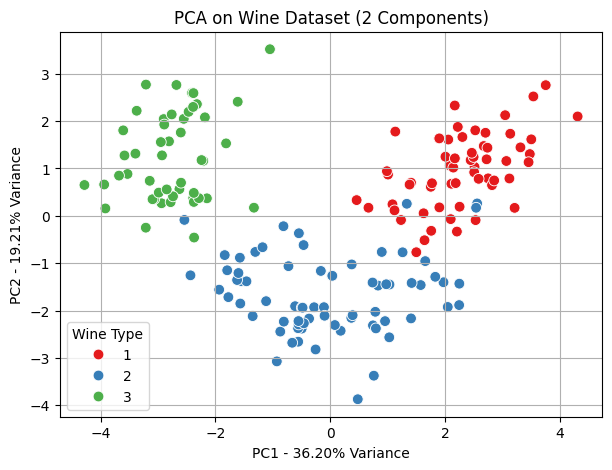


Explained Variance Ratio (each PC):
PC1: 0.3620
PC2: 0.1921


In [2]:
# Step 1: Load dataset
data = pd.read_csv("Wine.csv") 

# Step 2: Split features and target
X = data.drop('Customer_Segment', axis=1)
y = data['Customer_Segment']

# Step 3: Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Step 4: Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Create DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Segment'] = y

# Step 6: Plot PCA result
plt.figure(figsize=(7,5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Segment', palette='Set1', s=60)
plt.title('PCA on Wine Dataset (2 Components)')
plt.xlabel(f'PC1 - {pca.explained_variance_ratio_[0]*100:.2f}% Variance')
plt.ylabel(f'PC2 - {pca.explained_variance_ratio_[1]*100:.2f}% Variance')
plt.legend(title='Wine Type')
plt.grid(True)
plt.show()

# Step 7: Explained variance
print("\nExplained Variance Ratio (each PC):")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")
